# 📊 Visualización de Datos en Tiempo Real: Gráficas en Movimiento

Este notebook implementa visualizaciones dinámicas para datos en tiempo real, mostrando cómo enlazar datos numéricos con representaciones gráficas actualizadas en vivo.

## Objetivos
- Simular datos en tiempo real (temperatura, conteo de objetos, señales)
- Visualizar los datos mediante gráficos dinámicos con Matplotlib y Plotly
- Explorar diferentes técnicas de animación y actualización de gráficos

## 1. Importar Librerías Necesarias

In [1]:
# Importar librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time
from IPython.display import display, HTML

# Importar Plotly para gráficos interactivos
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configurar para visualización en notebook
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')  # Estilo visual agradable

# Importar opcional de OpenCV (comentar si no está instalado)
try:
    import cv2
    OPENCV_AVAILABLE = True
except ImportError:
    OPENCV_AVAILABLE = False
    print("OpenCV no está disponible. Las funciones de video estarán deshabilitadas.")

## 2. Simulación de Datos en Tiempo Real

Implementaremos generadores de datos que simulan:
1. Temperatura variable con ruido
2. Conteo de objetos
3. Señal sinusoidal (como sensor de movimiento)

In [2]:
class GeneradorDatos:
    """Clase para generar diferentes tipos de datos simulados en tiempo real"""
    
    def __init__(self):
        self.tiempo_inicio = time.time()
        
    def obtener_tiempo(self):
        """Retorna el tiempo transcurrido desde la inicialización"""
        return time.time() - self.tiempo_inicio
    
    def temperatura(self):
        """Simula una señal de temperatura con patrón sinusoidal y ruido aleatorio"""
        t = self.obtener_tiempo()
        # Temperatura base que oscila entre 20 y 25 grados
        base = 22.5 + 2.5 * np.sin(0.1 * t)
        # Agregar ruido aleatorio para simular variaciones
        ruido = np.random.normal(0, 0.2)
        return base + ruido
    
    def conteo_objetos(self, max_objetos=10):
        """Simula conteo de objetos con variación aleatoria"""
        # Simular detección de 0 a max_objetos
        return np.random.randint(0, max_objetos + 1)
    
    def senal_sensor(self):
        """Simula una señal de sensor con múltiples componentes de frecuencia"""
        t = self.obtener_tiempo()
        # Señal compuesta de diferentes frecuencias
        senal = 0.5 * np.sin(t) + 0.25 * np.sin(2.5 * t) + 0.15 * np.sin(5 * t)
        # Agregar ruido aleatorio
        ruido = np.random.normal(0, 0.05)
        return senal + ruido

# Inicializar el generador de datos
generador = GeneradorDatos()

# Probar los generadores
tiempo_actual = generador.obtener_tiempo()
print(f"Tiempo actual: {tiempo_actual:.2f} segundos")
print(f"Temperatura: {generador.temperatura():.2f}°C")
print(f"Conteo de objetos: {generador.conteo_objetos()} objetos")
print(f"Señal de sensor: {generador.senal_sensor():.3f} unidades")

Tiempo actual: 0.00 segundos
Temperatura: 22.47°C
Conteo de objetos: 6 objetos
Señal de sensor: -0.033 unidades


## 3. Visualización Dinámica con Matplotlib

Implementaremos un gráfico de líneas que se actualiza en tiempo real utilizando `FuncAnimation` de Matplotlib. Este método nos permite crear animaciones fluidas a partir de datos que cambian con el tiempo.

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_3000\2196338928.py:53: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, actualizar, frames=None,


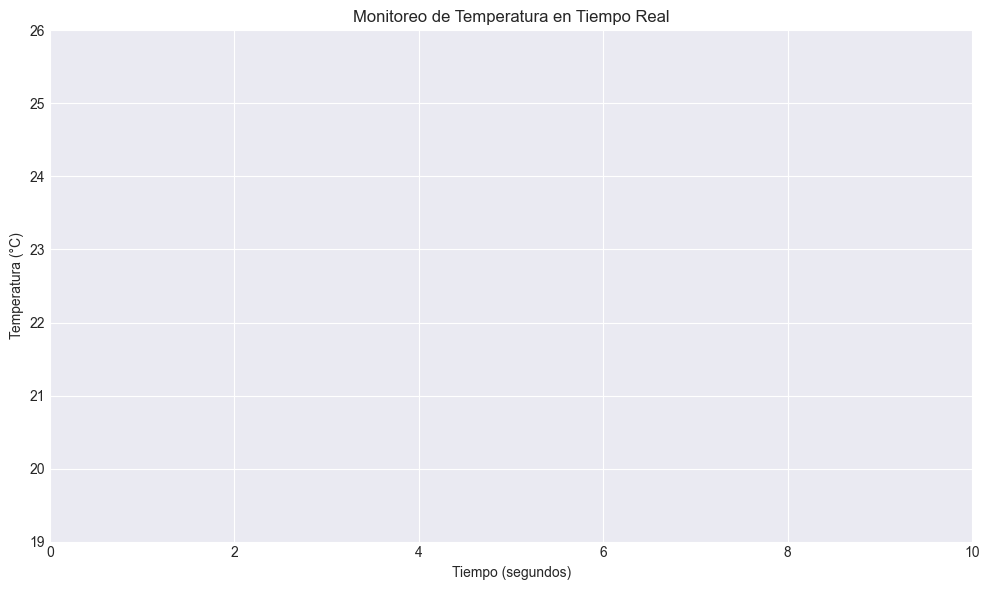

In [3]:
# Inicializar datos para la animación
tiempo_datos = []
temperatura_datos = []

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
linea, = ax.plot([], [], 'r-', lw=2)
ax.set_xlim(0, 10)  # Ajustar automáticamente más adelante
ax.set_ylim(19, 26)  # Rango esperado de temperatura
ax.grid(True)
ax.set_title('Monitoreo de Temperatura en Tiempo Real')
ax.set_xlabel('Tiempo (segundos)')
ax.set_ylabel('Temperatura (°C)')

# Texto para mostrar el valor actual
texto_valor = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# Función de inicialización
def init():
    """Inicializa la animación"""
    linea.set_data([], [])
    texto_valor.set_text('')
    return linea, texto_valor

# Función de actualización para cada frame
def actualizar(frame):
    """Actualiza el gráfico con nuevos datos"""
    # Obtener nuevos datos
    tiempo_actual = generador.obtener_tiempo()
    temp_actual = generador.temperatura()
    
    # Agregar a las listas
    tiempo_datos.append(tiempo_actual)
    temperatura_datos.append(temp_actual)
    
    # Limitar los datos para mostrar solo los últimos 100 puntos
    if len(tiempo_datos) > 100:
        del tiempo_datos[0]
        del temperatura_datos[0]
    
    # Actualizar datos de la línea
    linea.set_data(tiempo_datos, temperatura_datos)
    
    # Ajustar el límite del eje X para mostrar datos recientes
    ax.set_xlim(max(0, tiempo_actual - 30), tiempo_actual + 2)
    
    # Actualizar texto con valor actual
    texto_valor.set_text(f'Temperatura actual: {temp_actual:.2f}°C')
    
    return linea, texto_valor

# Crear la animación
ani = FuncAnimation(fig, actualizar, frames=None, 
                   init_func=init, blit=True, interval=100)

# Mostrar la animación (en notebook, funcionará automáticamente)
plt.tight_layout()
plt.show()

## 4. Visualización Dinámica con Plotly

Plotly nos permite crear gráficos interactivos que pueden actualizarse en tiempo real. Implementaremos un gráfico de barras para mostrar el conteo de objetos simulados.

In [4]:
# Simulación de conteo para diferentes categorías de objetos
categorias = ['Persona', 'Carro', 'Bicicleta', 'Perro', 'Gato']
max_objetos = [8, 5, 3, 2, 4]  # Máximo número para cada categoría

# Generar datos iniciales
def generar_conteos():
    """Genera conteos aleatorios para cada categoría"""
    return [generador.conteo_objetos(max_obj) for max_obj in max_objetos]

# Datos iniciales para el gráfico
conteos_actuales = generar_conteos()

# Crear figura
fig = go.Figure()

# Agregar barras para cada categoría
for i, categoria in enumerate(categorias):
    fig.add_trace(go.Bar(
        x=[categoria],
        y=[conteos_actuales[i]],
        name=categoria,
        text=[conteos_actuales[i]],
        textposition='auto'
    ))

# Configurar layout
fig.update_layout(
    title='Conteo de Objetos en Tiempo Real',
    yaxis=dict(
        title='Número de objetos',
        range=[0, 10]  # Establecer rango fijo
    ),
    xaxis=dict(
        title='Categorías'
    ),
    barmode='group',
    height=500
)

# Mostrar el gráfico
fig.show()

# Para actualizar este gráfico en tiempo real, normalmente usaríamos Dash
# Aquí simularemos una actualización manual para propósitos de demostración
from IPython.display import display, clear_output
import time

# Función para actualizar el gráfico
def actualizar_grafico_plotly():
    # Generar nuevos conteos
    nuevos_conteos = generar_conteos()
    
    # Actualizar figura
    fig = go.Figure()
    
    for i, categoria in enumerate(categorias):
        fig.add_trace(go.Bar(
            x=[categoria],
            y=[nuevos_conteos[i]],
            name=categoria,
            text=[nuevos_conteos[i]],
            textposition='auto'
        ))
    
    # Configurar layout
    fig.update_layout(
        title='Conteo de Objetos en Tiempo Real',
        yaxis=dict(
            title='Número de objetos',
            range=[0, 10]
        ),
        xaxis=dict(
            title='Categorías'
        ),
        barmode='group',
        height=500
    )
    
    # Limpiar salida anterior y mostrar actualización
    clear_output(wait=True)
    display(fig)

# Comentar esta línea para evitar actualizaciones automáticas en el notebook
# Este código actualizaría el gráfico cada 2 segundos durante 5 iteraciones
"""
for _ in range(5):
    actualizar_grafico_plotly()
    time.sleep(2)
"""

'\nfor _ in range(5):\n    actualizar_grafico_plotly()\n    time.sleep(2)\n'

## 5. Visualización con OpenCV (Opcional)

Si tienes OpenCV instalado, esta sección muestra cómo combinar una visualización de gráficos en tiempo real con una fuente de video (simulado en este caso).

In [5]:
# Este código se ejecutará solo si OpenCV está disponible
if OPENCV_AVAILABLE:
    # Función para crear un gráfico y convertirlo a imagen para OpenCV
    def crear_grafico_opencv(datos_x, datos_y, titulo="Señal del Sensor"):
        # Crear figura de matplotlib
        fig, ax = plt.subplots(figsize=(6, 3))
        ax.plot(datos_x, datos_y, 'b-')
        ax.set_title(titulo)
        ax.set_xlabel('Tiempo (s)')
        ax.set_ylabel('Valor')
        ax.grid(True)
        
        # Convertir figura a imagen
        fig.canvas.draw()
        img = np.array(fig.canvas.renderer.buffer_rgba())
        img = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)
        
        plt.close(fig)  # Cerrar la figura para liberar memoria
        return img
    
    # Función para simular un video con detección
    def simular_deteccion_video():
        # Crear un fondo negro como "video simulado"
        frame = np.zeros((480, 640, 3), dtype=np.uint8)
        
        # Simular objeto detectado (rectángulo aleatorio)
        x, y = np.random.randint(100, 500), np.random.randint(100, 400)
        w, h = np.random.randint(50, 150), np.random.randint(50, 150)
        
        # Dibujar rectángulo
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        # Añadir texto
        cv2.putText(frame, "Objeto", (x, y-10), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
        return frame, 1  # Frame y número de objetos detectados

    # Código principal para visualización con OpenCV
    def demo_opencv():
        # Datos para el gráfico
        datos_x = []
        datos_y = []
        conteos = []
        tiempos_conteo = []
        
        # Tiempo inicial
        tiempo_inicio = time.time()
        
        try:
            while True:
                # Obtener tiempo actual
                tiempo_actual = time.time() - tiempo_inicio
                
                # Simular señal y detección
                valor_sensor = generador.senal_sensor()
                frame, num_objetos = simular_deteccion_video()
                
                # Agregar datos para gráficos
                datos_x.append(tiempo_actual)
                datos_y.append(valor_sensor)
                conteos.append(num_objetos)
                tiempos_conteo.append(tiempo_actual)
                
                # Mantener solo los últimos 50 puntos
                if len(datos_x) > 50:
                    datos_x.pop(0)
                    datos_y.pop(0)
                if len(conteos) > 20:
                    conteos.pop(0)
                    tiempos_conteo.pop(0)
                
                # Crear gráficos
                grafico_sensor = crear_grafico_opencv(datos_x, datos_y, "Señal del Sensor")
                grafico_conteo = crear_grafico_opencv(tiempos_conteo, conteos, "Conteo de Objetos")
                
                # Redimensionar gráficos para que coincidan con el ancho del frame
                h, w = frame.shape[:2]
                grafico_sensor = cv2.resize(grafico_sensor, (w, int(w * grafico_sensor.shape[0] / grafico_sensor.shape[1])))
                grafico_conteo = cv2.resize(grafico_conteo, (w, int(w * grafico_conteo.shape[0] / grafico_conteo.shape[1])))
                
                # Combinar frame y gráficos verticalmente
                resultado = np.vstack([frame, grafico_sensor, grafico_conteo])
                
                # Mostrar imagen combinada
                cv2.imshow("Visualización en Tiempo Real", resultado)
                
                # Salir con 'q'
                if cv2.waitKey(100) & 0xFF == ord('q'):
                    break
                
                # Pequeña pausa para simular procesamiento en tiempo real
                time.sleep(0.1)
        
        finally:
            cv2.destroyAllWindows()
    
    # Descomenta la siguiente línea para ejecutar la demostración de OpenCV
    # demo_opencv()
    
    # NOTA: En un notebook, esta demostración no funcionará correctamente
    # ya que OpenCV necesita interacción con ventanas nativas.
    # Este código está pensado para ejecutarse en un script separado.
    print("Código OpenCV listo para ser ejecutado en un script separado.")
    
else:
    print("OpenCV no disponible. Instala 'opencv-python' para usar esta funcionalidad.")

Código OpenCV listo para ser ejecutado en un script separado.


## 6. Guardar GIF Animado del Gráfico

Para documentar nuestras visualizaciones, podemos guardar las animaciones como archivos GIF que pueden incluirse en el README del proyecto.

In [6]:
# Primero, verificamos si pillow está instalado (necesario para guardar GIF)
try:
    from matplotlib.animation import PillowWriter
    PILLOW_AVAILABLE = True
except ImportError:
    PILLOW_AVAILABLE = False
    print("Pillow no está disponible. Instala 'pillow' para guardar GIFs.")

# Función para crear y guardar una animación como GIF
def crear_y_guardar_gif(duracion=5, fps=20, nombre_archivo='../resultados/temperatura_tiempo_real.gif'):
    """
    Crea una animación de temperatura y la guarda como GIF
    
    Args:
        duracion: Duración de la animación en segundos
        fps: Frames por segundo
        nombre_archivo: Ruta donde guardar el GIF
    """
    if not PILLOW_AVAILABLE:
        print("No se puede guardar GIF sin pillow instalado.")
        return
    
    # Reiniciar el generador para tener datos limpios
    generador_nuevo = GeneradorDatos()
    
    # Datos para la animación
    tiempos = []
    temperaturas = []
    
    # Configurar figura
    fig, ax = plt.subplots(figsize=(10, 6))
    linea, = ax.plot([], [], 'r-', lw=2)
    ax.set_xlim(0, duracion)
    ax.set_ylim(19, 26)
    ax.grid(True)
    ax.set_title('Monitoreo de Temperatura en Tiempo Real')
    ax.set_xlabel('Tiempo (segundos)')
    ax.set_ylabel('Temperatura (°C)')
    
    # Texto para valor actual
    texto_valor = ax.text(0.02, 0.95, '', transform=ax.transAxes)
    
    # Función de inicialización
    def init():
        linea.set_data([], [])
        texto_valor.set_text('')
        return linea, texto_valor
    
    # Función de actualización
    def update(frame):
        # En lugar de tiempo real, simulamos el tiempo según el número de frame
        tiempo_simulado = frame / fps
        
        # Simulamos temperatura para ese tiempo
        temp = 22.5 + 2.5 * np.sin(0.5 * tiempo_simulado) + np.random.normal(0, 0.2)
        
        # Agregar datos
        tiempos.append(tiempo_simulado)
        temperaturas.append(temp)
        
        # Actualizar gráfico
        linea.set_data(tiempos, temperaturas)
        texto_valor.set_text(f'Temperatura: {temp:.2f}°C')
        
        return linea, texto_valor
    
    # Calcular número total de frames
    total_frames = int(duracion * fps)
    
    # Crear animación
    ani = FuncAnimation(fig, update, frames=range(total_frames),
                       init_func=init, blit=True, interval=50)
    
    # Guardar como GIF
    print(f"Guardando GIF en {nombre_archivo}...")
    writer = PillowWriter(fps=fps)
    ani.save(nombre_archivo, writer=writer)
    print(f"GIF guardado correctamente.")
    
    # Mostrar confirmación con una miniatura
    from IPython.display import Image, display
    display(Image(nombre_archivo))
    
    plt.close(fig)  # Cerrar la figura para liberar memoria

# Descomenta la siguiente línea para crear y guardar el GIF
# crear_y_guardar_gif(duracion=10, fps=20)

## 7. Código Relevante para Documentación

A continuación, extraemos los fragmentos de código más relevantes para incluir en el README.md del proyecto, destacando las partes clave de nuestra implementación.

In [7]:
# Fragmentos para incluir en el README.md

# 1. Simulación de datos (temperatura)
codigo_simulacion = '''
def temperatura(self):
    """Simula una señal de temperatura con patrón sinusoidal y ruido aleatorio"""
    t = self.obtener_tiempo()
    # Temperatura base que oscila entre 20 y 25 grados
    base = 22.5 + 2.5 * np.sin(0.1 * t)
    # Agregar ruido aleatorio para simular variaciones
    ruido = np.random.normal(0, 0.2)
    return base + ruido
'''

# 2. Animación con Matplotlib
codigo_matplotlib = '''
# Función de actualización para cada frame
def actualizar(frame):
    # Obtener nuevos datos
    tiempo_actual = generador.obtener_tiempo()
    temp_actual = generador.temperatura()
    
    # Agregar a las listas
    tiempo_datos.append(tiempo_actual)
    temperatura_datos.append(temp_actual)
    
    # Actualizar datos de la línea
    linea.set_data(tiempo_datos, temperatura_datos)
    
    # Ajustar el límite del eje X para mostrar datos recientes
    ax.set_xlim(max(0, tiempo_actual - 30), tiempo_actual + 2)
    
    return linea, texto_valor

# Crear la animación
ani = FuncAnimation(fig, actualizar, frames=None, 
                   init_func=init, blit=True, interval=100)
'''

# 3. Actualización con Plotly
codigo_plotly = '''
# Callback para actualizar el gráfico
def update_graph(n):
    global df
    
    # Obtener nuevos datos
    conteo = detector.simular_deteccion()
    tiempo_actual = datetime.now().strftime("%H:%M:%S")
    
    # Crear nuevo DataFrame con la detección actual
    nueva_fila = pd.DataFrame({
        'tiempo': [tiempo_actual],
        'persona': [conteo['persona']],
        'carro': [conteo['carro']],
        # ...otras categorías...
    })
    
    # Concatenar con los datos existentes
    df = pd.concat([df, nueva_fila], ignore_index=True)
    
    # Mantener solo los últimos 30 puntos
    if len(df) > 30:
        df = df.iloc[-30:]
'''

# Imprimir códigos formateados
print("# Código para simulación de datos:\n")
print(codigo_simulacion)
print("\n# Código para animación con Matplotlib:\n")
print(codigo_matplotlib)
print("\n# Código para actualización con Plotly:\n")
print(codigo_plotly)

# Código para simulación de datos:


def temperatura(self):
    """Simula una señal de temperatura con patrón sinusoidal y ruido aleatorio"""
    t = self.obtener_tiempo()
    # Temperatura base que oscila entre 20 y 25 grados
    base = 22.5 + 2.5 * np.sin(0.1 * t)
    # Agregar ruido aleatorio para simular variaciones
    ruido = np.random.normal(0, 0.2)
    return base + ruido


# Código para animación con Matplotlib:


# Función de actualización para cada frame
def actualizar(frame):
    # Obtener nuevos datos
    tiempo_actual = generador.obtener_tiempo()
    temp_actual = generador.temperatura()

    # Agregar a las listas
    tiempo_datos.append(tiempo_actual)
    temperatura_datos.append(temp_actual)

    # Actualizar datos de la línea
    linea.set_data(tiempo_datos, temperatura_datos)

    # Ajustar el límite del eje X para mostrar datos recientes
    ax.set_xlim(max(0, tiempo_actual - 30), tiempo_actual + 2)

    return linea, texto_valor

# Crear la animación
ani = FuncAnim

## 8. Conclusiones y Reflexiones

En este taller, hemos explorado diferentes técnicas para visualizar datos en tiempo real mediante gráficos dinámicos. Algunas reflexiones importantes:

### Utilidad de la visualización en tiempo real

- **Toma de decisiones inmediata**: Permite identificar patrones, tendencias y anomalías en el momento que ocurren.
- **Monitoreo continuo**: Ideal para sistemas que requieren supervisión constante como sensores, tráfico web o procesos industriales.
- **Experiencia interactiva**: Mejora la comprensión de los datos al mostrar su evolución temporal de forma visual e intuitiva.

### Dificultades encontradas

- **Rendimiento**: Mantener un equilibrio entre la frecuencia de actualización y el rendimiento general.
- **Escalabilidad**: Manejar eficientemente grandes volúmenes de datos que se actualizan rápidamente.
- **Diseño visual**: Elegir representaciones que sean claras y significativas incluso cuando los datos cambian constantemente.

### Comparación de herramientas

- **Matplotlib + FuncAnimation**: Excelente para visualizaciones científicas detalladas, pero con limitaciones de interactividad.
- **Plotly + Dash**: Ofrece mayor interactividad y mejores opciones para dashboards, pero con mayor complejidad inicial.
- **OpenCV + Matplotlib**: Combinación potente para integrar análisis visual con procesamiento de imágenes y video.

Las visualizaciones en tiempo real son una herramienta fundamental para análisis de datos modernos, especialmente en campos como IoT, monitoreo de sistemas y aplicaciones interactivas.